<a href="https://colab.research.google.com/github/Leo270499/Apuntes/blob/main/Desafio_APIS_Leonardo_S%C3%A1nchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío: Descargando datos desde APIs públicas

Para este desafío hago uso de la API pública Bureau of Labor of Statistics U.S. DEPARTMENT OF LABOR. Pues, el tema de interes de mi proyecto es un modelo de clasificación sobre el abandono de trabajo.

En este churn, se presentan muchas variables que muestarn inconformidad en el empleo, por lo tanto, he decidido trabajar con esta API para conseguir valores relevantes de empleo.

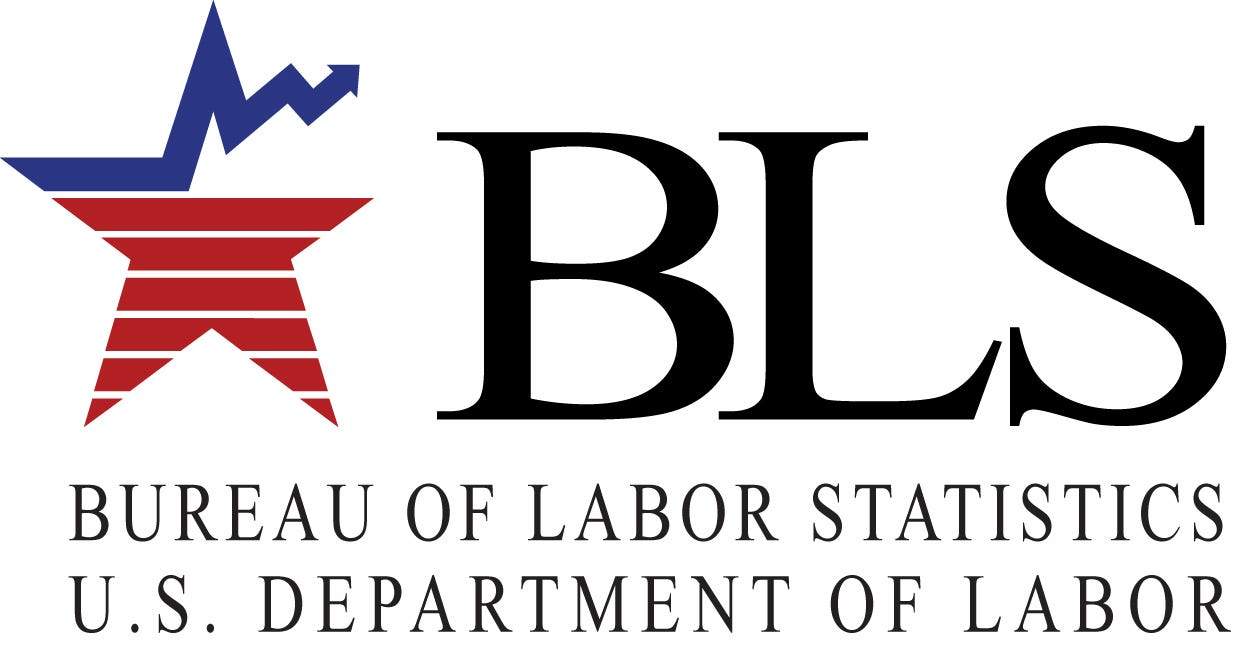

## 1 | Accediendo a la API

Esta página pública presenta su API para desarrolladores, con el fin de dar acceso a la información e insitar a la investigación.

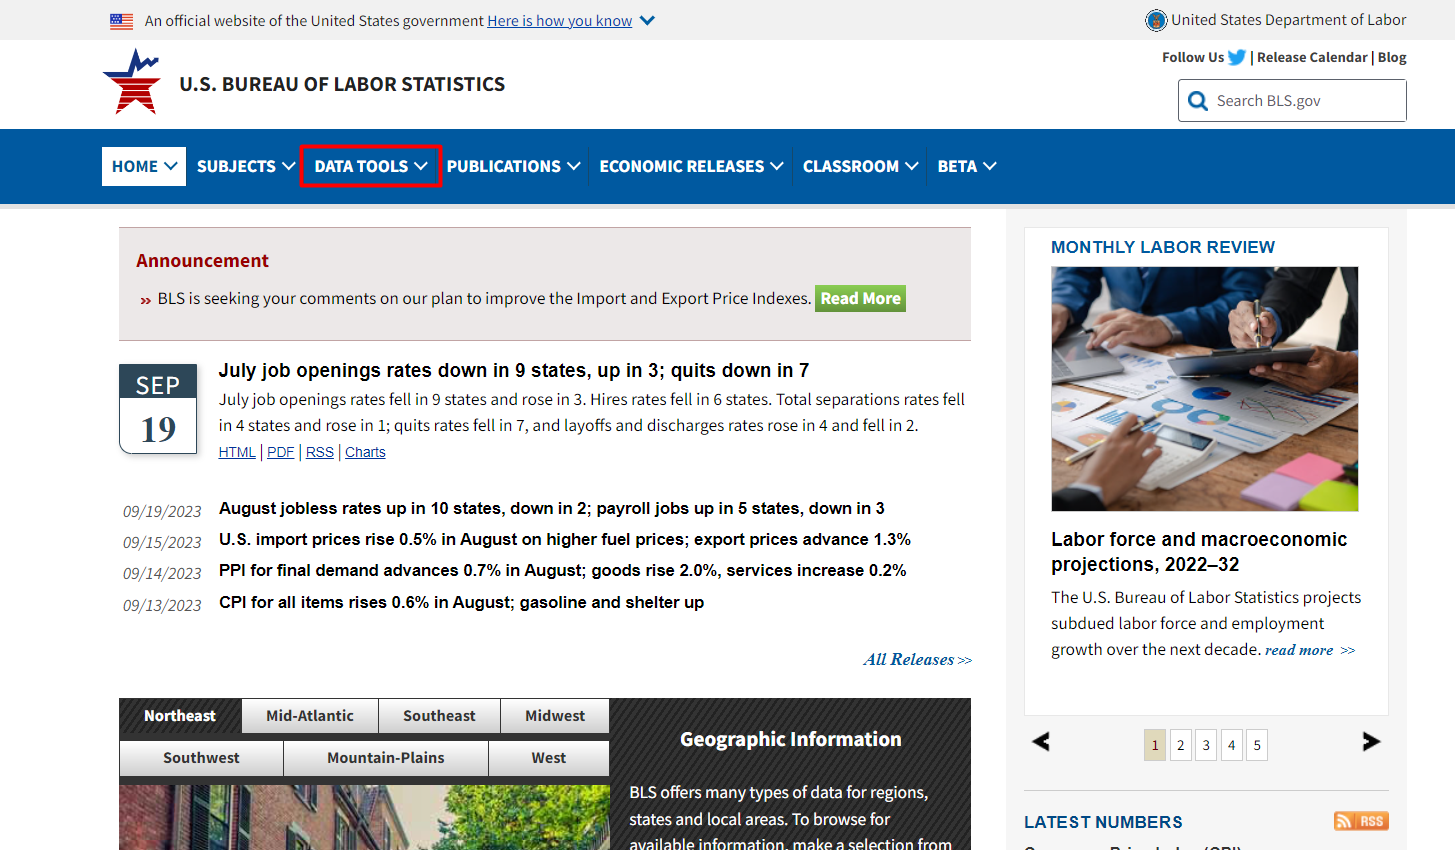

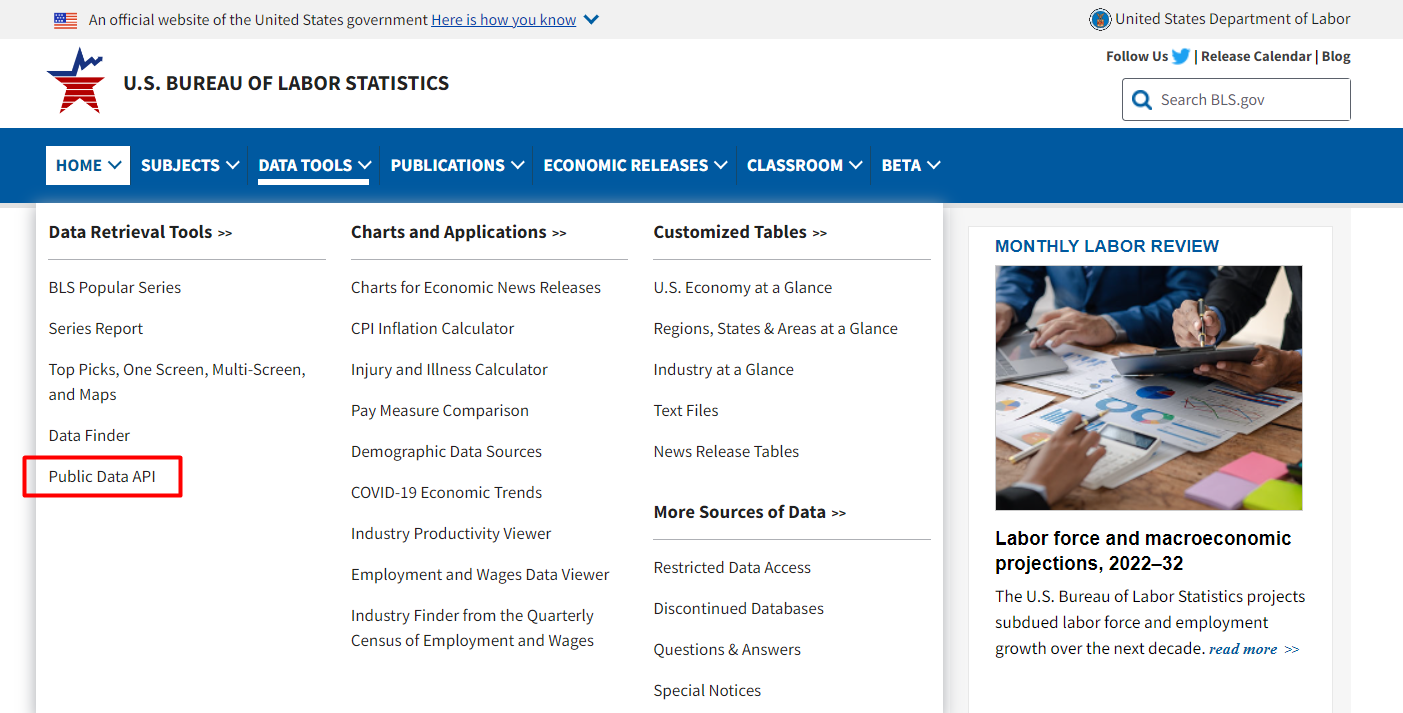

## 2 | Extracción de datos con Credenciales

Luego de obtener el APIkey por correo, podemos empezar a extraer información

In [1]:
import requests
import json
import pandas as pd

In [3]:
headers = {'Content-type': 'application/json'}
data = json.dumps({
    "seriesid": ['CUUR0000SA0', 'SUUR0000SA0'],
    "startyear": "2011",
    "endyear": "2014"
})

api_key = "fa5d296842774cbdb2452768bdeace89"
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

response = requests.post(url, data=data, headers=headers, params={"registrationKey": api_key})

if response.status_code == 200:
    json_data = json.loads(response.text)
else:
    print("Error al obtener datos de la API:", response.status_code)

In [4]:
if response.status_code == 200:
    json_data = json.loads(response.text)
    # Aquí puedes procesar los datos de respuesta
    print("Datos de respuesta:", json_data)
else:
    print("Error al obtener datos de la API:", response.status_code)
    print("Texto de respuesta:", response.text)

Datos de respuesta: {'status': 'REQUEST_SUCCEEDED', 'responseTime': 182, 'message': [], 'Results': {'series': [{'seriesID': 'CUUR0000SA0', 'data': [{'year': '2014', 'period': 'M12', 'periodName': 'December', 'value': '234.812', 'footnotes': [{}]}, {'year': '2014', 'period': 'M11', 'periodName': 'November', 'value': '236.151', 'footnotes': [{}]}, {'year': '2014', 'period': 'M10', 'periodName': 'October', 'value': '237.433', 'footnotes': [{}]}, {'year': '2014', 'period': 'M09', 'periodName': 'September', 'value': '238.031', 'footnotes': [{}]}, {'year': '2014', 'period': 'M08', 'periodName': 'August', 'value': '237.852', 'footnotes': [{}]}, {'year': '2014', 'period': 'M07', 'periodName': 'July', 'value': '238.250', 'footnotes': [{}]}, {'year': '2014', 'period': 'M06', 'periodName': 'June', 'value': '238.343', 'footnotes': [{}]}, {'year': '2014', 'period': 'M05', 'periodName': 'May', 'value': '237.900', 'footnotes': [{}]}, {'year': '2014', 'period': 'M04', 'periodName': 'April', 'value': '

## 3 | Obteniendo el dataframe

In [7]:
# Definiendo las series
series_info = {
    "LNS14000000": "Unemployment Rate",
    "CES0000000001": "Total Nonfarm Employment",
    "LNS11300000": "Labor Force Participation Rate",
    "LNU04000000": "Civilian Labor Force",
    "LNS12000000": "Employed",
    "LNS12300000": "Not in Labor Force",
    "CES0500000003": "Average Hourly Earnings",
    "CES0500000001": "Average Weekly Earnings",
    "LNS12035019": "Unemployment Rate - White",
    "CUUR0000SA0": "Consumer Price Index for All Urban Consumers (CPI-U)"
}

api_key = "fa5d296842774cbdb2452768bdeace89"
base_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

# Inicializa una lista para almacenar los DataFrames de las series
data_frames = []

# Obtiene los datos de las series y los almacena en la lista data_frames
for series_id in series_info.keys():
    url = f"{base_url}{series_id}?registrationkey={api_key}&format=json"
    response = requests.get(url)
    data = response.json()
    if "Results" in data and "series" in data["Results"]:
        series_data = data["Results"]["series"][0]
        df = pd.DataFrame(series_data["data"])
        df["series_id"] = series_id
        data_frames.append(df)

# Concatena los DataFrames en uno solo
final_df = pd.concat(data_frames)

# Reemplaza los códigos de series por los nombres correspondientes
final_df["series_id"] = final_df["series_id"].map(series_info)

In [6]:
final_df

,year,period,periodName,latest,value,footnotes,series_id
0,2023,M08,August,true,3.8,[{}],Unemployment Rate
1,2023,M07,July,NaN,3.5,[{}],Unemployment Rate
2,2023,M06,June,NaN,3.6,[{}],Unemployment Rate
3,2023,M05,May,NaN,3.7,[{}],Unemployment Rate
4,2023,M04,April,NaN,3.4,[{}],Unemployment Rate
...,...,...,...,...,...,...,...
27,2021,M05,May,NaN,269.195,[{}],Consumer Price Index for All Urban Consumers (...
28,2021,M04,April,NaN,267.054,[{}],Consumer Price Index for All Urban Consumers (...
29,2021,M03,March,NaN,264.877,[{}],Consumer Price Index for All Urban Consumers (...
30,2021,M02,February,NaN,263.014,[{}],Consumer Price Index for All Urban Consumers (...


Obteniendo una base de datos normalizada

In [9]:
# Excel
archivo_excel = "API_series.xlsx"
final_df.to_excel(archivo_excel, index=False)